In [6]:
import numpy as np
import pandas as pd

$\large\text{NLP Intro to word embeddings}$

In [10]:
words = ['Walter', 'Jesse', 'Gus']

$\text{One hot encoding}$

In [11]:
encode = []

In [12]:
for i in range(len(words)):
    encode.append(np.zeros(len(words)))
    encode[i][i] = 1
    print('word:', words[i] + ',', 'encode:', encode[i])

word: Walter, encode: [1. 0. 0.]
word: Jesse, encode: [0. 1. 0.]
word: Gus, encode: [0. 0. 1.]


***

$\text{Bag of Words}$

In [ ]:
dictionary = ['Walter', 'Jesse', 'Gus', 'Hank', 'Saul', 'Skyler', 'and']

In [ ]:
sentence = ['Walter', 'and', 'Gus']
encode = [0, 0, 0, 0, 0, 0, 0]

In [ ]:
for i in sentence:
    for j, word in enumerate(dictionary):
        if i == word:
            encode[j] = 1
            break
print('sentence:', words, end='') 
print(',', 'encode:', encode)

sentence: ['Walter', 'Jesse', 'Gus'], encode: [1, 0, 1, 0, 0, 0, 1]


***

$\text{Token normalization}$

$\small\text{Stemming | Porter's stemmer}$

$\small\text{Lemmatization | NLTK | WordNet}$

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sentense = 'Walter kill Gus and 9 prisoners'
words = word_tokenize(sentense)

In [ ]:
words

['Walter', 'kill', 'Gus', 'and', '9', 'prisoners']

In [ ]:
wordsFiltered = []

In [ ]:
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)

print(wordsFiltered)

['Walter', 'kill', 'Gus', '9', 'prisoners']


***

$\text{Use n-gramms}$

$\small\text{Now bi-gramms is our tokens}$

In [ ]:
from nltk import ngrams
n = 2
sixgrams = ngrams(wordsFiltered, n)

for grams in sixgrams:
  print(grams)

('Walter', 'kill')
('kill', 'Gus')
('Gus', '9')
('9', 'prisoners')


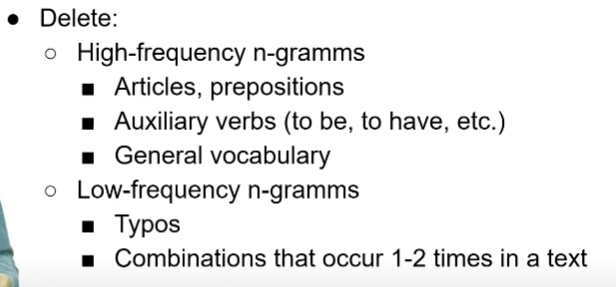

***

$\text{Tf and Idf}$

In [ ]:
n = 2

sentense_A = 'Jesse love Andrea and Brock'

sentense_B = 'Jesse hate Todd and Jack'

In [ ]:
dictionary = word_tokenize(sentense_A + ' ' + sentense_B)
dictionary = dictionary[0:5] + dictionary[6:8] + dictionary[9:10]
dictionary_with_duplicate = word_tokenize(sentense_A + ' ' + sentense_B)
dictionary

['Jesse', 'love', 'Andrea', 'and', 'Brock', 'hate', 'Todd', 'Jack']

$\text{tf}$

In [ ]:
tf_A = [0] * len(dictionary)
tf_B = [0] * len(dictionary)

for i, word in enumerate(dictionary):
    tf_A[i] = sentense_A.count(word) / len(sentense_A.split(' '))
    tf_B[i] = sentense_B.count(word) / len(sentense_B.split(' '))

$\text{idf}$

In [ ]:
idf_A = [0] * len(dictionary)
idf_B = [0] * len(dictionary)

for i, word in enumerate(dictionary):
    idf_A[i] = np.log(n / dictionary_with_duplicate.count(word))
    idf_B[i] = np.log(n / dictionary_with_duplicate.count(word))

In [ ]:
data = pd.DataFrame({'Words':dictionary, 'tf_A':tf_A, 'tf_B':tf_B, 'idf_A':idf_A, 'idf_B':idf_B})
data['tf * idf A'] = data['tf_A'] * data['idf_A']
data['tf * idf B'] = data['tf_B'] * data['idf_B']
data

,Words,tf_A,tf_B,idf_A,idf_B,tf * idf A,tf * idf B
0,Jesse,0.2,0.2,0.000000,0.000000,0.000000,0.000000
1,love,0.2,0.0,0.693147,0.693147,0.138629,0.000000
2,Andrea,0.2,0.0,0.693147,0.693147,0.138629,0.000000
3,and,0.2,0.2,0.000000,0.000000,0.000000,0.000000
4,Brock,0.2,0.0,0.693147,0.693147,0.138629,0.000000
5,hate,0.0,0.2,0.693147,0.693147,0.000000,0.138629
6,Todd,0.0,0.2,0.693147,0.693147,0.000000,0.138629
7,Jack,0.0,0.2,0.693147,0.693147,0.000000,0.138629


***